In [29]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Correlation Analysis:


In [30]:
Indices = yf.download(tickers=["^IXIC", "^NSEI"], start="2010-01-01", end = "2023-05-01")

[*********************100%***********************]  2 of 2 completed


In [31]:
Indices.dropna(inplace=True)

In [32]:
nasdaq_prices = Indices.loc[:, 'Adj Close']['^IXIC']
nifty_prices = Indices.loc[:, 'Adj Close']['^NSEI']

In [33]:
prices_df = pd.concat([nasdaq_prices, nifty_prices], axis=1, keys=['NASDAQ', 'NIFTY'])


In [34]:
prices_df

,NASDAQ,NIFTY
Date,,
2010-01-04,2308.419922,5232.200195
2010-01-05,2308.709961,5277.899902
2010-01-06,2301.090088,5281.799805
2010-01-07,2300.050049,5263.100098
2010-01-08,2317.169922,5244.750000
...,...,...
2023-04-24,12037.200195,17743.400391
2023-04-25,11799.160156,17769.250000
2023-04-26,11854.349609,17813.599609


In [35]:
correlation = prices_df['NASDAQ'].corr(prices_df['NIFTY'])
print("Correlation Coeff.: ", correlation)

Correlation Coeff.:  0.9513138758576779


The correlation coefficient of 0.9513 suggests a **strong** (as absolute value is close to 1) and **positive** (as the coeff. is positive) correlation between the two indices

# Lead-Lag Relationship

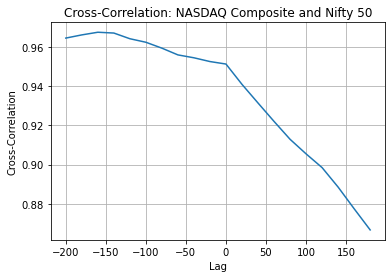

In [36]:
# Calculate cross-correlation
cross_corr = np.correlate(nasdaq_prices, nifty_prices, mode='full')

# Create lag array for x-axis
# lags = np.arange(-(len(nasdaq_prices)-1), len(nasdaq_prices))
lags = np.arange(-200, 200, 20)

cross_corr = []
for lag in lags :
    shifted_nifty = prices_df['NIFTY'].shift(lag)
    correlation = prices_df['NASDAQ'].corr(shifted_nifty)
    cross_corr.append(correlation)

# Plot cross-correlation
plt.plot(lags, cross_corr)
plt.title('Cross-Correlation: NASDAQ Composite and Nifty 50')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()


Inferences from above chart:
* The stronges correlation between the two indices appears at -150 days 
* The NASDAQ Composite index consistently lags behind Nifty 50 by 150 days
* Thus, NIFTY 50 shall be used for parameter optimization because of its consistent leading behaviour


# Indicator Coding

* KELTNER CHANNEL

In [37]:
# Simple Moving Average
sma_period = 20  
sma_nasdaq = prices_df['NASDAQ'].rolling(sma_period).mean()
sma_nifty = prices_df['NIFTY'].rolling(sma_period).mean()

In [38]:
# Average True Range (ATR)
atr_period = 10  
high_low_nasdaq = prices_df['NASDAQ'].diff().abs()
high_low_nifty = prices_df['NIFTY'].diff().abs()
true_range_nasdaq = high_low_nasdaq.rolling(atr_period).mean()
true_range_nifty = high_low_nifty.rolling(atr_period).mean()

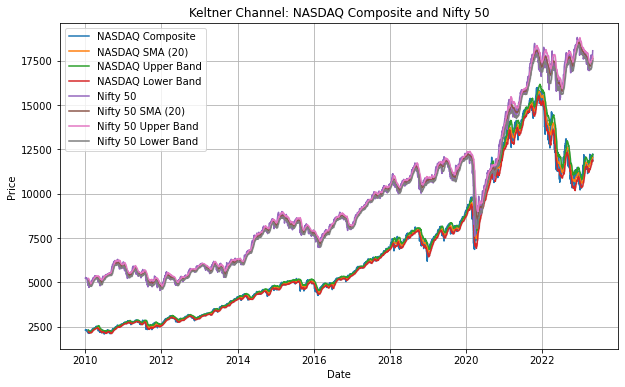

In [39]:




# Calculate the Keltner Channel bands
mult = 2.0  # Multiplier for the ATR
upper_band_nifty = sma_nifty + (mult * true_range_nifty)
lower_band_nifty = sma_nifty - (mult * true_range_nifty)

# Plotting the Keltner Channel
plt.figure(figsize=(10, 6))

# plt.plot(sma_nasdaq, label=f'NASDAQ SMA ({sma_period})')
# plt.plot(upper_band_nasdaq, label='NASDAQ Upper Band')
# plt.plot(lower_band_nasdaq, label='NASDAQ Lower Band')
plt.plot(prices_df['NIFTY'], label='Nifty 50')
plt.plot(sma_nifty, label=f'Nifty 50 SMA ({sma_period})')
plt.plot(upper_band_nifty, label='Nifty 50 Upper Band')
plt.plot(lower_band_nifty, label='Nifty 50 Lower Band')
plt.fill_between(prices_df.index,  upper_band_nasdaq, alpha=0.2, color='gray')
plt.fill_between(prices_df.index, lower_band_nifty, upper_band_nifty, alpha=0.2, color='gray')
plt.title('Keltner Channel: Nifty 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()